# Codigo base

In [1]:
source("utils.r")

# Cargar datos

In [2]:
# Example of how to call the function
url <- "https://github.com/mbarrena/tesis/blob/main/data/Data%20trimestral%201950%20a%202023%20con%201%20DUMMY%20CORTA%20outliers%20(2q%203q%201989%201q1990)%20.xlsx?raw=true"
temp_file <- tempfile(fileext = ".xlsx")
GET(url, write_disk(temp_file, overwrite = TRUE))

# Read the `data` from the Excel file
df_trimestral_crudo <- read_excel(temp_file)

Response [https://raw.githubusercontent.com/mbarrena/tesis/refs/heads/main/data/Data%20trimestral%201950%20a%202023%20con%201%20DUMMY%20CORTA%20outliers%20(2q%203q%201989%201q1990)%20.xlsx]
  Date: 2025-04-02 14:40
  Status: 200
  Content-Type: application/octet-stream
  Size: 56.7 kB
<ON DISK>  /var/folders/59/6k0yx0n916gg1mdb04zs42rm0000gn/T//RtmpaoDl4L/file3588599c3836.xlsxNULL

In [3]:
# Select specific columns and rows from df_trimestral_crudo
df_Arg <- df_trimestral_crudo |> 
  dplyr::slice(37:dplyr::n()) |>  # Equivalent to iloc[36:] (1-based index in R)
  dplyr::select(año, trimestre, ipc_ajust, E, Ebc, pbird, impp_usa, Psoja_USA, Pmaíz_USA, Ptrigo_USA, TOTfmi, D1) |>  # nolint
  as.data.frame()  # Convert to data frame (if needed)

# Rename "ipc_ajust" to "ipc"
df_Arg <- renameColumnOfDataframe(df_Arg, "ipc_ajust", "ipc")

# Display first 6 rows
print(head(df_Arg))

# Display first 65 rows
print(head(df_Arg, 65))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
    año trimestre          ipc            E          Ebc  pbird impp_usa
1  1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2  1959      2ºTr 3.074744e-11 8.556667e-12 8.317

In [4]:
# Copy df_Arg to df_ERPT_Arg1
df_ERPT_Arg1 <- df_Arg

# Display first rows
print(head(df_ERPT_Arg1))

# Apply logarithm to specific columns
df_ERPT_Arg1 <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg1) # nolint: line_length_linter.

# Display transformed dataframe
print(head(df_ERPT_Arg1))
print(tail(df_ERPT_Arg1))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.5127

In [5]:
# Create df_ERPT_Arg as a copy of df_Arg
df_ERPT_Arg <- df_Arg

# Display first rows
print(head(df_ERPT_Arg))

# Apply logarithm transformation
df_ERPT_Arg <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display transformed dataframe
print(head(df_ERPT_Arg))

# Apply differencing transformation
df_ERPT_Arg <- makeDiffColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display first and last rows
print(head(df_ERPT_Arg))
print(tail(df_ERPT_Arg, 90))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.5127

# Regresiones

Threshold var is binary: will not use logistic decomposition

Run configurations:

lags_endog_lin,lags_criterion,max_lags,lags_exog,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
NA,AIC,6,6,0,1,0.95,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,259,"E, ipc, pbird",3


Lags for Shock: E

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,3,3,3,1,3,1,1,1
ipc,3,3,3,3,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Lags for Shock: ipc

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,3,3,3,1,3,1,1,1
ipc,3,3,3,3,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Lags for Shock: pbird

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,3,3,3,1,3,1,1,1
ipc,3,3,3,3,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Impulse: E -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.4805585,0.48055851,0.4805585,0.480558509,0.4805585,0.4805585
2,2,0.3846618,0.12287072,0.6464529,0.823353063,0.2913474,1.3553587
3,3,0.3607182,0.09321044,0.6282259,0.205912620,-0.2165860,0.6284112
4,4,0.3588398,0.04945818,0.6682213,0.889923892,-1.6436665,3.4235143
5,5,0.2617024,-0.10908954,0.6324944,0.245790007,-3.5775236,4.0691037
6,6,0.2469909,-0.12803440,0.6220162,0.169792046,-0.6883636,1.0279477
7,7,0.2755765,-0.26192257,0.8130755,0.808162324,NaN,NaN
8,8,0.4362446,-0.11692017,0.9894093,0.196232025,NaN,NaN
9,9,0.3582758,-0.06515015,0.7817018,0.085436976,-0.1081300,0.2790039


Impulse: E -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1,-0.0393527471,-0.03935275,-0.03935275,-0.039352747,-0.039352747,-0.039352747
13,2,-0.0210647867,-0.05698681,0.01485724,-0.028955141,-0.025249611,-0.032660670
14,3,-0.0250356223,-0.06315982,0.01308858,0.012718083,-0.051033741,0.076469907
15,4,-0.0042003926,-0.04957121,0.04117043,-0.031428027,-0.071275964,0.008419911
16,5,0.0007112952,-0.05176409,0.05318668,0.001206072,-0.011757338,0.014169482
17,6,0.0072380809,-0.03754991,0.05202607,0.013779280,0.003943966,0.023614594
18,7,-0.0006248273,-0.04367556,0.04242591,0.002275619,-0.012237729,0.016788968
19,8,-0.0050124412,-0.06523978,0.05521490,-0.001757486,-0.012587292,0.009072319
20,9,0.0051724292,-0.02821579,0.03856065,0.010869455,-0.009029742,0.030768652


Impulse: ipc -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,1,0.000000000,0.000000000,0.0000000,0.00000000,0.000000000,0.0000000
24,2,0.361813087,-0.187126936,0.9107531,17.72242081,16.472167743,18.9726739
25,3,0.283169661,-0.041360455,0.6076998,2.67823632,2.254070300,3.1024023
26,4,0.658558469,0.143053227,1.1740637,0.53521406,-4.771216630,5.8416448
27,5,0.445874778,-0.189528011,1.0812776,14.00199724,10.608398135,17.3955964
28,6,-0.002494714,-0.567255340,0.5622659,-0.47946645,-1.683486582,0.7245537
29,7,0.503744598,-0.163168980,1.1706582,0.65718094,0.467389323,0.8469726
30,8,0.494468265,-0.433874492,1.4228110,-0.41164478,-1.809397090,0.9861075
31,9,0.354022789,-0.132664063,0.8407096,-0.01389713,-0.073635259,0.0458410


Impulse: ipc -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,1,-0.038779768,-0.03877977,-0.038779768,-0.038779768,-0.038779768,-0.038779768
35,2,-0.007000560,-0.03325961,0.019258492,0.076319253,0.083898254,0.068740253
36,3,-0.008954245,-0.04719695,0.029288456,-0.195598334,-0.272528736,-0.118667932
37,4,0.001588379,-0.04346781,0.046644565,0.014096848,-0.007000730,0.035194427
38,5,0.011602343,-0.03715083,0.060355516,-0.015288678,-0.018001974,-0.012575382
39,6,-0.004931832,-0.04567686,0.035813200,-0.009409118,-0.015574000,-0.003244236
40,7,-0.029914942,-0.07413490,0.014305017,-0.021666286,-0.028337695,-0.014994876
41,8,-0.022826127,-0.08061343,0.034961175,0.017815941,0.011620834,0.024011047
42,9,-0.026384104,-0.05931892,0.006550714,-0.002532442,-0.006436188,0.001371305


Impulse: pbird -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,1,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
46,2,-0.5886918,-1.7744600,0.5970765,97.5797927,95.103388,100.0561977
47,3,-0.1915850,-1.2011354,0.8179653,-14.4720241,-16.536119,-12.4079295
48,4,0.0492059,-0.8242568,0.9226687,-36.2991919,-39.993544,-32.6048400
49,5,-0.2107092,-0.8689479,0.4475295,18.0535119,14.064428,22.0425960
50,6,0.8361960,-0.3630053,2.0353973,-55.4785770,-58.014988,-52.9421664
51,7,-0.3633545,-1.4095418,0.6828327,-4.1314762,-13.320857,5.0579051
52,8,-0.2576703,-1.0206693,0.5053286,-26.2032735,-30.971372,-21.4351754
53,9,0.6700911,-0.4712670,1.8114492,-1.3527952,-3.167401,0.4618108


Impulse: pbird -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,0.00000000,0.0000000,0.0000000,0.000000,0.000000,0.000000
57,2,0.21781428,-0.1338081,0.5694367,42.699632,41.710793,43.688471
58,3,0.33733521,-0.1121688,0.7868392,43.524073,42.209277,44.838870
59,4,0.30243953,-0.2145201,0.8193992,-57.853431,-59.612371,-56.094491
60,5,0.26014948,-0.2593872,0.7796862,45.533784,42.996820,48.070747
61,6,0.60643143,-0.1281813,1.3410442,-50.796906,-52.797217,-48.796595
62,7,0.34415417,-0.3728137,1.0611221,-80.314426,NaN,NaN
63,8,-0.06412945,-0.7626262,0.6343673,-55.063616,NaN,NaN
64,9,0.64518133,-0.3542614,1.6446241,-2.378149,-5.891384,1.135086


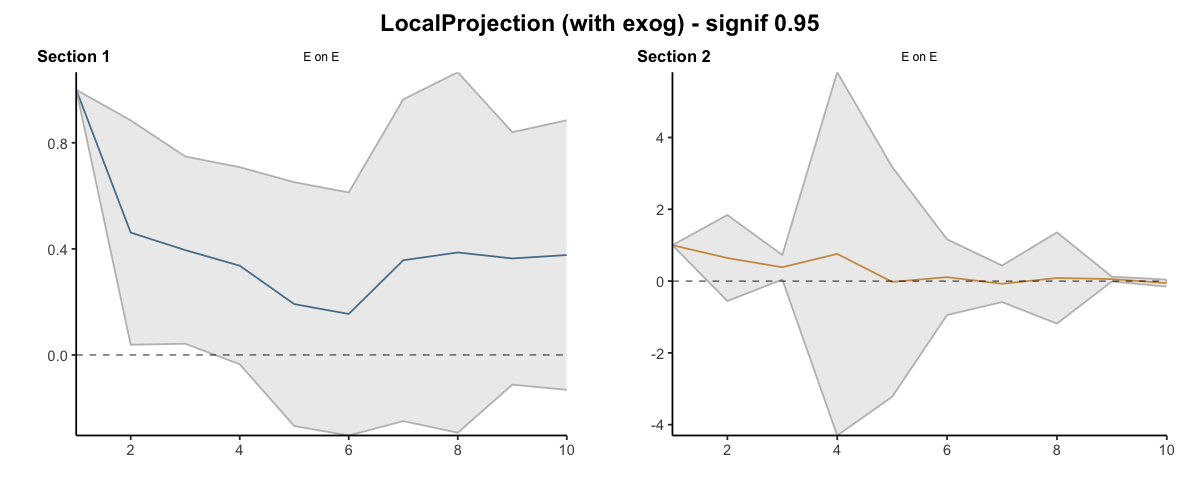

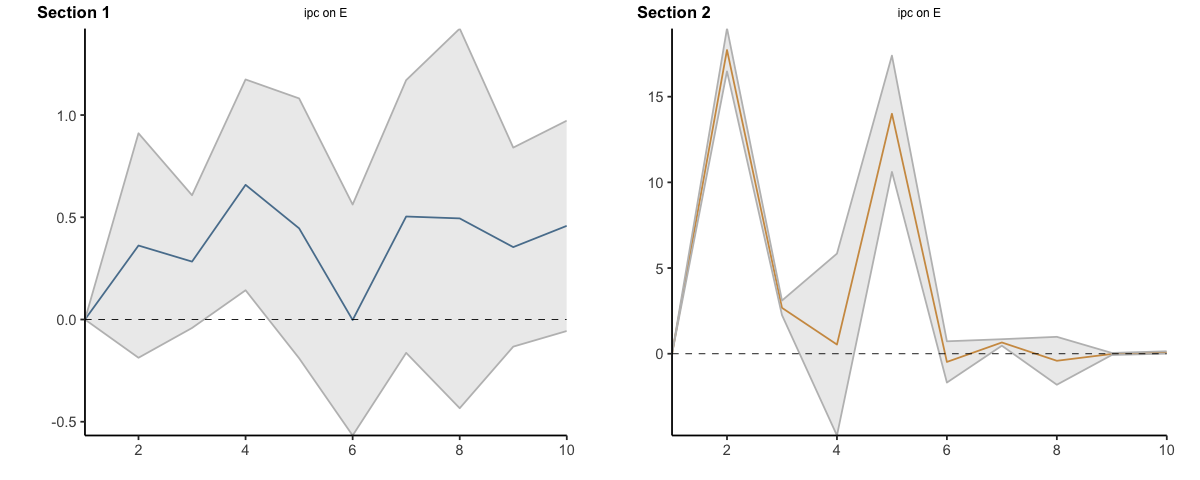

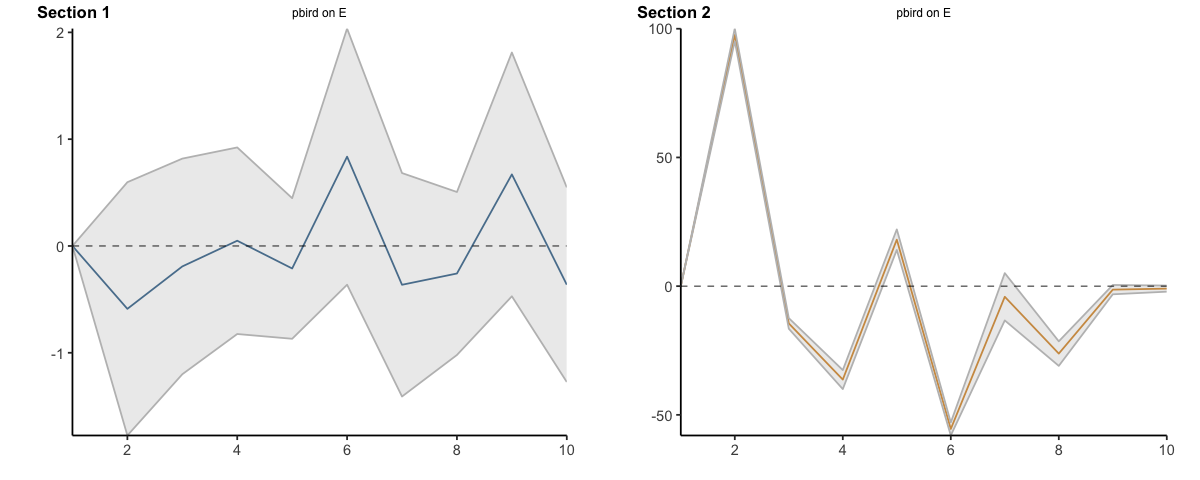

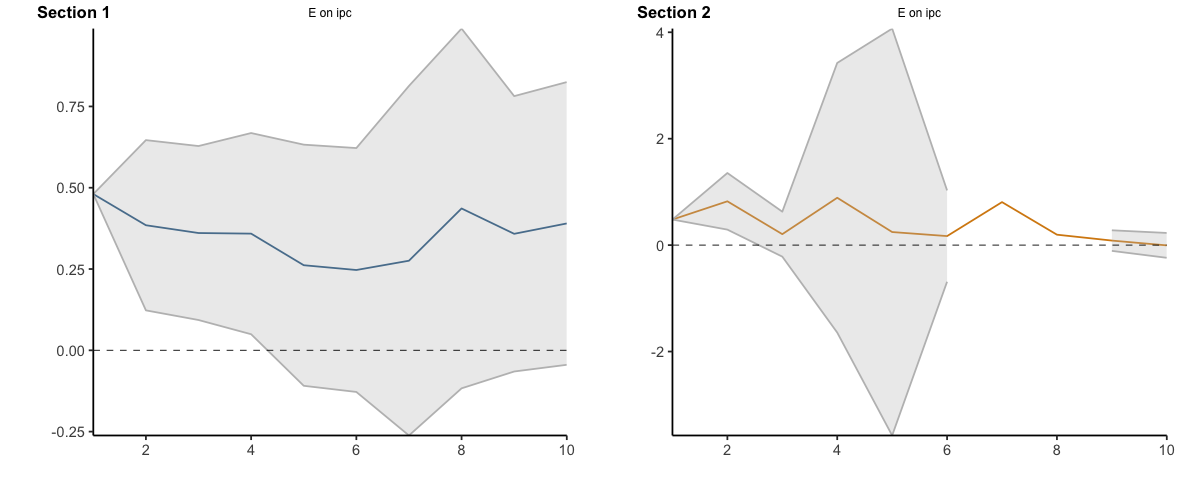

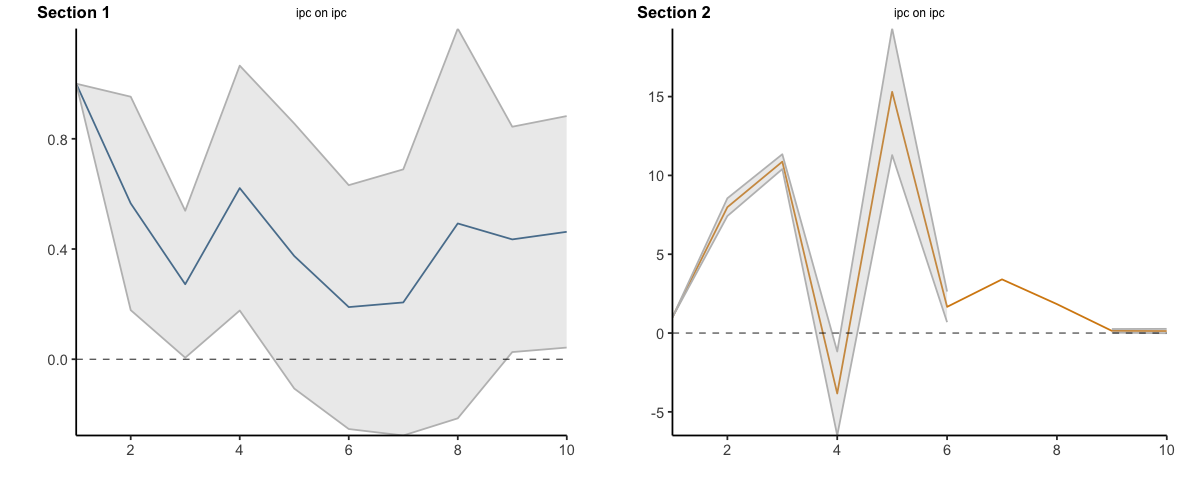

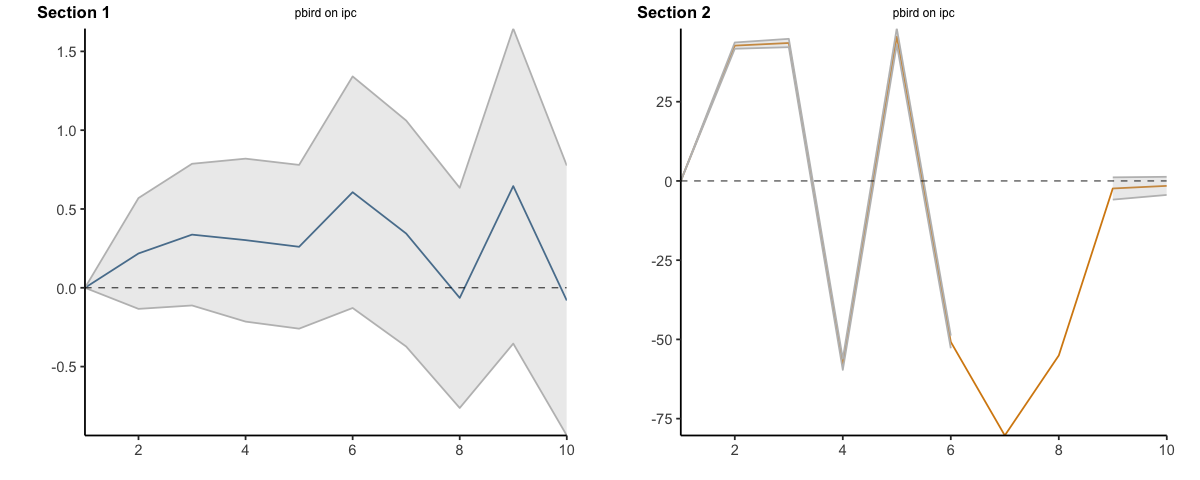

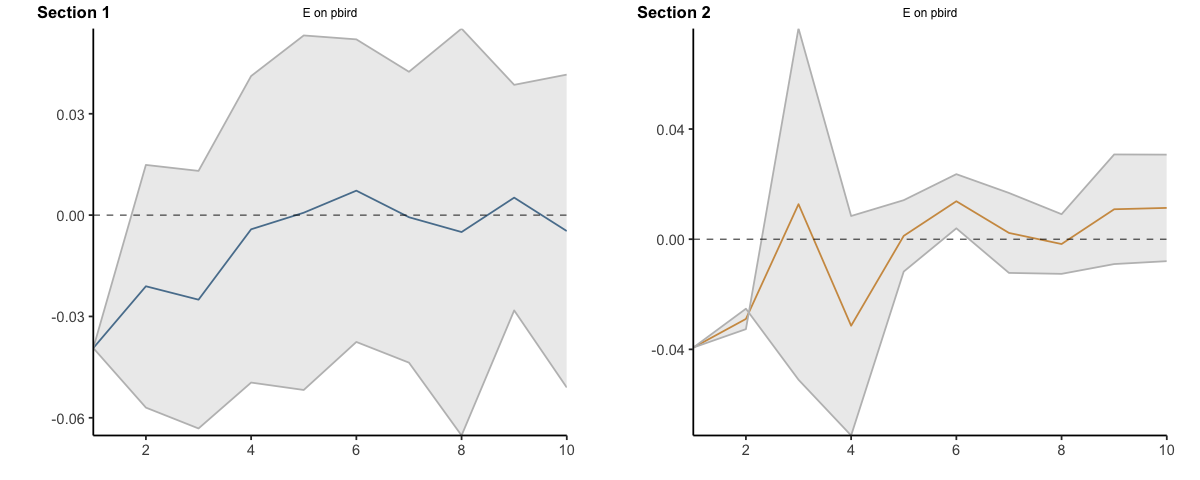

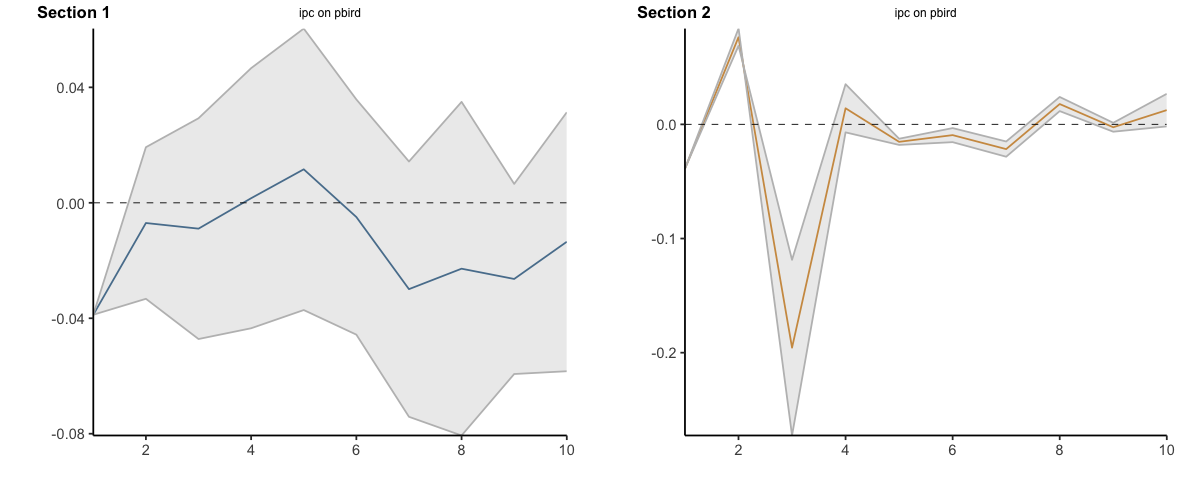

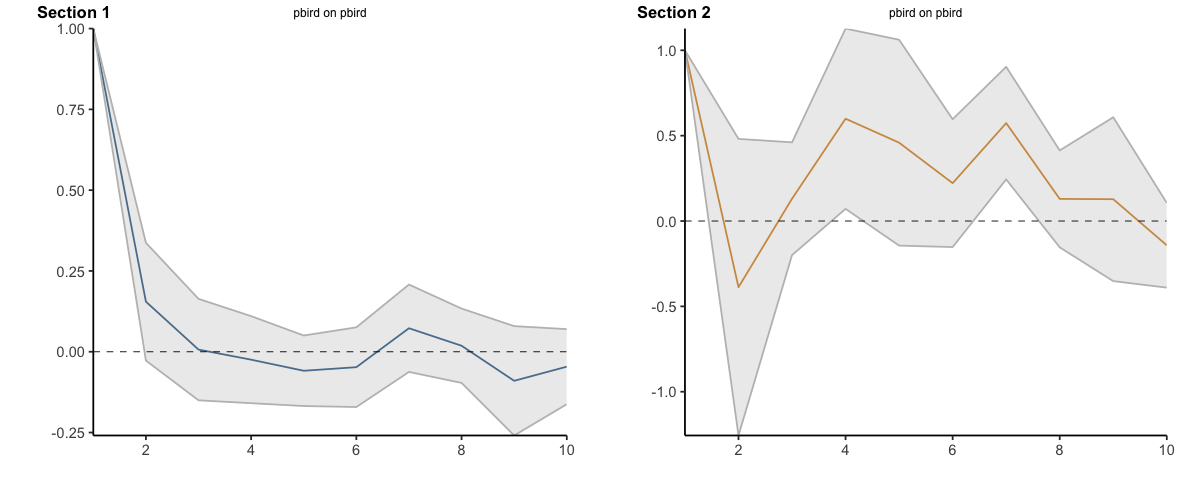

In [6]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = FALSE, threshold_var = c("D1"))

Threshold var is binary: will not use logistic decomposition

Run configurations:

lags_endog_lin,lags_criterion,max_lags,lags_exog,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
NA,AIC,6,6,0,1,0.95,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,259,"E, ipc, pbird",3


Lags for Shock: E

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,3,3,3,1,3,1,1,1
ipc,3,3,3,3,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Lags for Shock: ipc

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,3,3,3,1,3,1,1,1
ipc,3,3,3,3,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Lags for Shock: pbird

Variable,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,3,3,3,3,3,1,3,1,1,1
ipc,3,3,3,3,3,4,4,1,1,1
pbird,1,3,1,1,1,1,1,1,1,1


Impulse: E -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.4805585,0.480558509,0.4805585,0.4805585,0.4805585,0.4805585
2,2,0.8652203,0.603429225,1.1270114,1.3039116,0.7719060,1.8359172
3,3,1.2259385,0.696639669,1.7552373,1.5098242,0.5553200,2.4643284
4,4,1.5847783,0.746097845,2.4234587,2.3997481,-1.0883466,5.8878428
5,5,1.8464807,0.637008308,3.0559530,2.6455381,-4.6658702,9.9569464
6,6,2.0934716,0.508973910,3.6779692,2.8153301,-5.3542339,10.9848941
7,7,2.3690480,0.247051335,4.4910447,3.6234925,NaN,NaN
8,8,2.8052926,0.130131169,5.4804540,3.8197245,NaN,NaN
9,9,3.1635684,0.064981024,6.2621559,3.9051615,NaN,NaN


Impulse: E -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1,-0.03935275,-0.03935275,-0.03935275,-0.03935275,-0.03935275,-0.03935275
13,2,-0.06041753,-0.09633956,-0.02449551,-0.06830789,-0.06460236,-0.07201342
14,3,-0.08545316,-0.15949938,-0.01140693,-0.05558980,-0.11563610,0.00445649
15,4,-0.08965355,-0.20907059,0.02976350,-0.08701783,-0.18691206,0.01287640
16,5,-0.08894225,-0.26083468,0.08295018,-0.08581176,-0.19866940,0.02704588
17,6,-0.08170417,-0.29838459,0.13497625,-0.07203248,-0.19472544,0.05066048
18,7,-0.08232900,-0.34206016,0.17740216,-0.06975686,-0.20696317,0.06744944
19,8,-0.08734144,-0.40729994,0.23261705,-0.07151435,-0.21955046,0.07652176
20,9,-0.08216901,-0.43551573,0.27117770,-0.06064489,-0.22858020,0.10729042


Impulse: ipc -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,1,0.0000000,0.00000000,0.0000000,0.00000,0.00000,0.00000
24,2,0.3618131,-0.18712694,0.9107531,17.72242,16.47217,18.97267
25,3,0.6449827,-0.22848739,1.5184529,20.40066,18.72624,22.07508
26,4,1.3035412,-0.08543416,2.6925166,20.93587,13.95502,27.91672
27,5,1.7494160,-0.27496217,3.7737942,34.93787,24.56342,45.31232
28,6,1.7469213,-0.84221752,4.3360601,34.45840,22.87993,46.03687
29,7,2.2506659,-1.00538650,5.5067183,35.11558,23.34732,46.88384
30,8,2.7451341,-1.43926099,6.9295293,34.70394,21.53793,47.86995
31,9,3.0991569,-1.57192505,7.7702389,34.69004,21.46429,47.91579


Impulse: ipc -> Response: pbird

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,1,-0.03877977,-0.03877977,-0.03877977,-0.03877977,-0.03877977,-0.03877977
35,2,-0.04578033,-0.07203938,-0.01952128,0.03753949,0.04511849,0.02996048
36,3,-0.05473457,-0.11923633,0.00976718,-0.15805885,-0.22741025,-0.08870745
37,4,-0.05314619,-0.16270413,0.05641175,-0.14396200,-0.23441098,-0.05351302
38,5,-0.04154385,-0.19985496,0.11676726,-0.15925068,-0.25241295,-0.06608840
39,6,-0.04647568,-0.24553183,0.15258046,-0.16865980,-0.26798695,-0.06933264
40,7,-0.07639063,-0.31966673,0.16688548,-0.19032608,-0.29632465,-0.08432751
41,8,-0.09921675,-0.40028016,0.20184665,-0.17251014,-0.28470382,-0.06031647
42,9,-0.12560086,-0.45959908,0.20839737,-0.17504258,-0.29114000,-0.05894516


Impulse: pbird -> Response: E

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,1,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000
46,2,-0.5886918,-1.774460,0.5970765,97.579793,95.103388,100.056198
47,3,-0.7802768,-2.975595,1.4150418,83.107769,78.567269,87.648268
48,4,-0.7310709,-3.799852,2.3377104,46.808577,38.573725,55.043428
49,5,-0.9417801,-4.668800,2.7852399,64.862089,52.638153,77.086024
50,6,-0.1055841,-5.031805,4.8206372,9.383512,-5.376835,24.143858
51,7,-0.4689387,-6.441347,5.5034699,5.252035,-18.697692,29.201763
52,8,-0.7266090,-7.462017,6.0087985,-20.951238,-49.669064,7.766588
53,9,-0.0565179,-7.933284,7.8202477,-22.304033,-52.836465,8.228398


Impulse: pbird -> Response: ipc

,horizon,IRF S1,Lower S1,Upper S1,IRF S2,Lower S2,Upper S2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,0.0000000,0.0000000,0.0000000,0.00000,0.00000,0.00000
57,2,0.2178143,-0.1338081,0.5694367,42.69963,41.71079,43.68847
58,3,0.5551495,-0.2459769,1.3562758,86.22371,83.92007,88.52734
59,4,0.8575890,-0.4604970,2.1756750,28.37027,24.30770,32.43285
60,5,1.1177385,-0.7198842,2.9553612,73.90406,67.30452,80.50360
61,6,1.7241699,-0.8480655,4.2964054,23.10715,14.50730,31.70700
62,7,2.0683241,-1.2208792,5.3575274,-57.20727,NaN,NaN
63,8,2.0041946,-1.9835055,5.9918947,-112.27089,NaN,NaN
64,9,2.6493760,-2.3377669,7.6365188,-114.64904,NaN,NaN


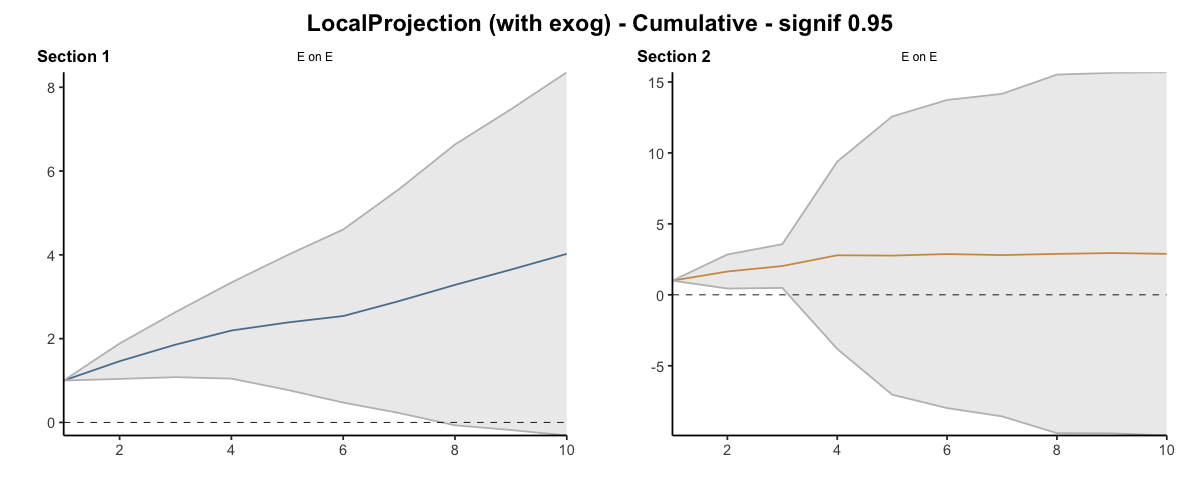

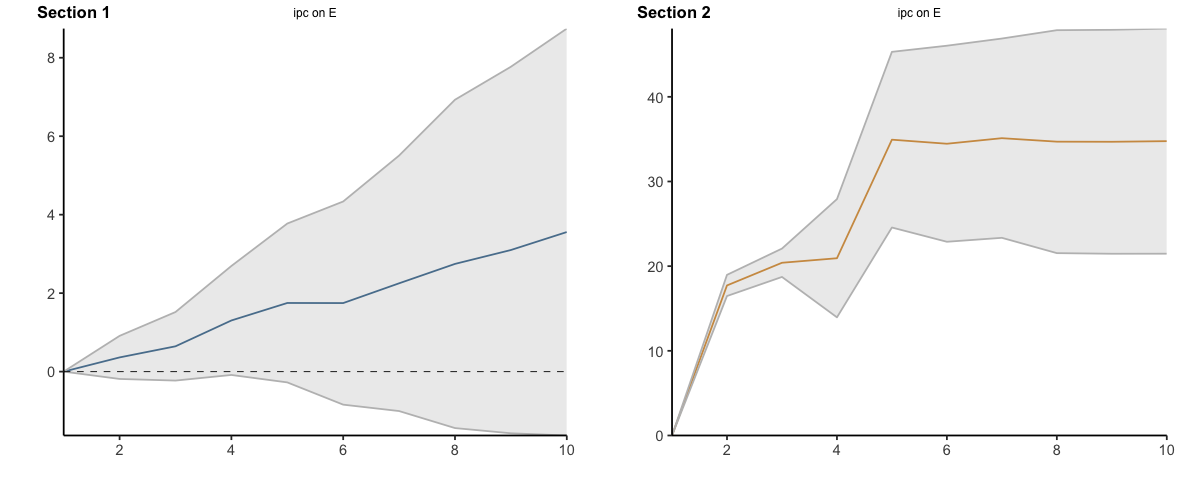

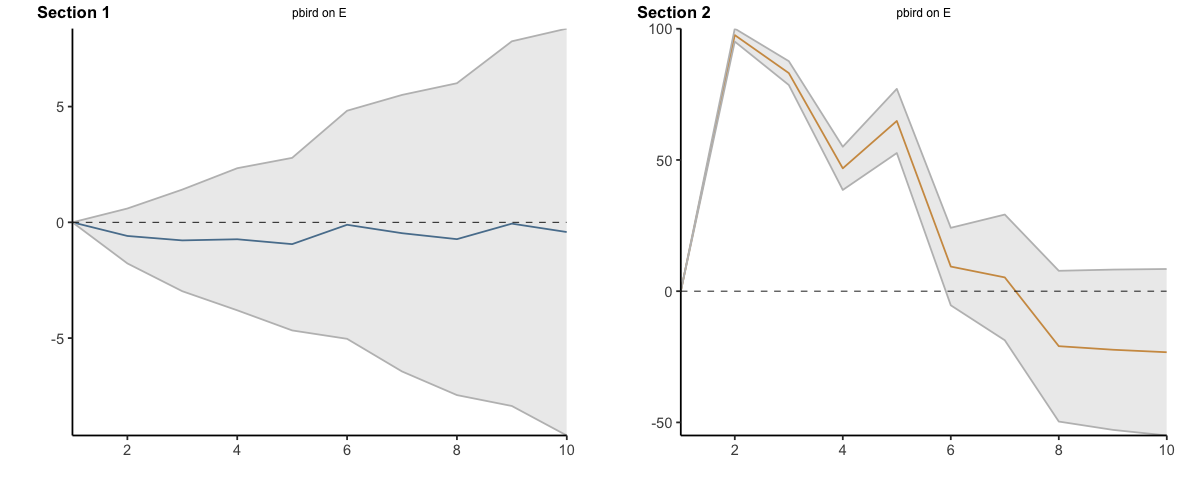

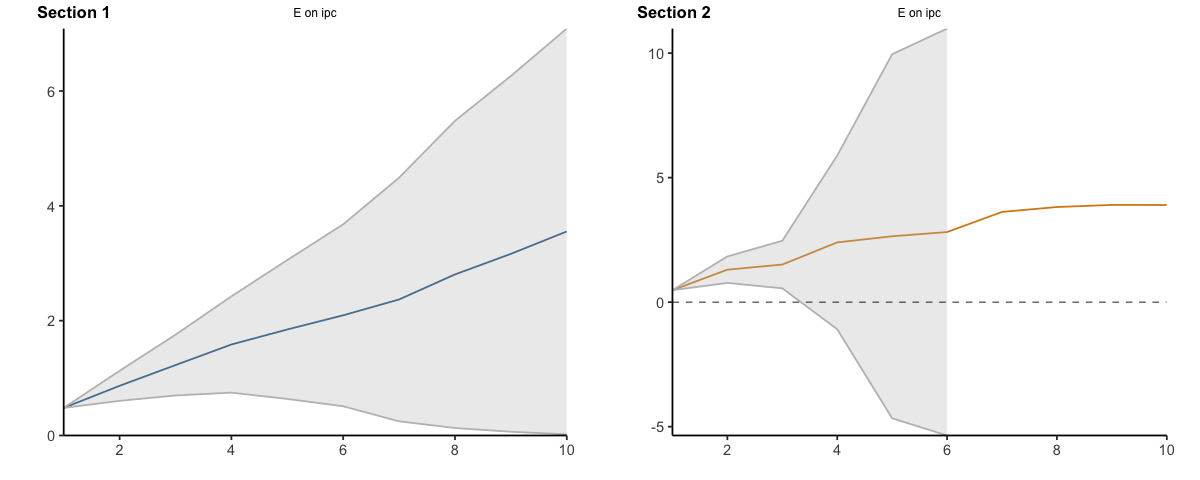

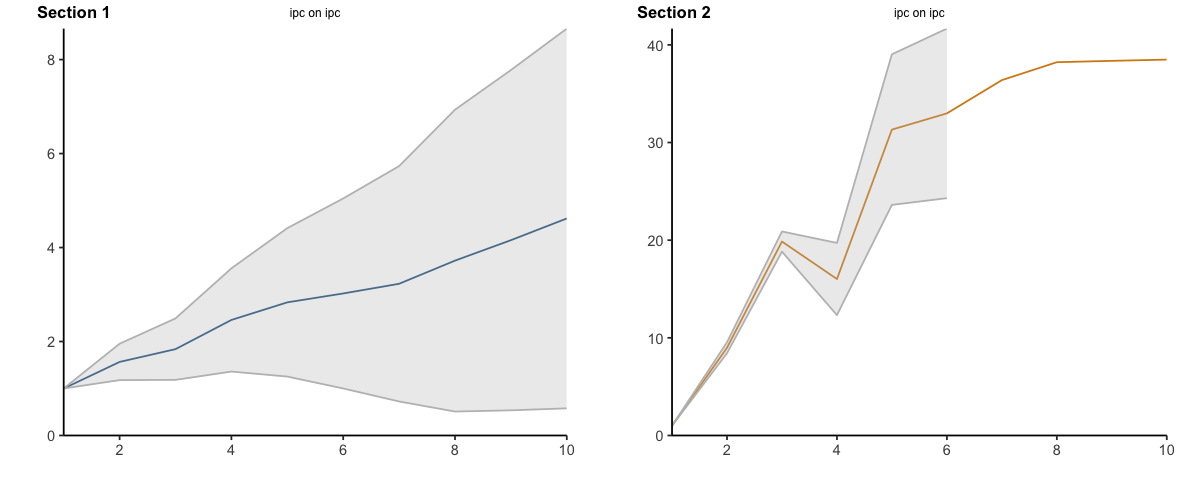

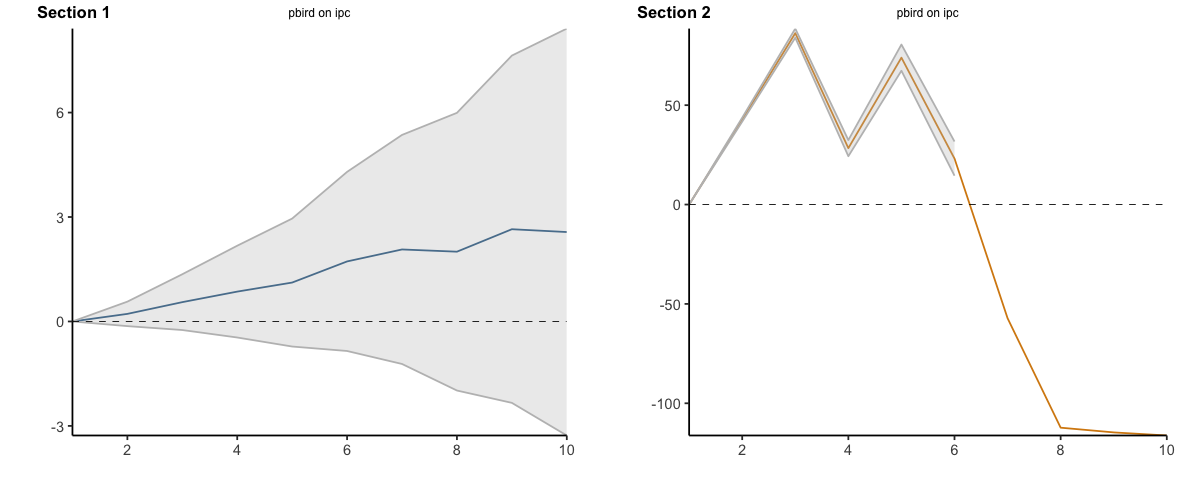

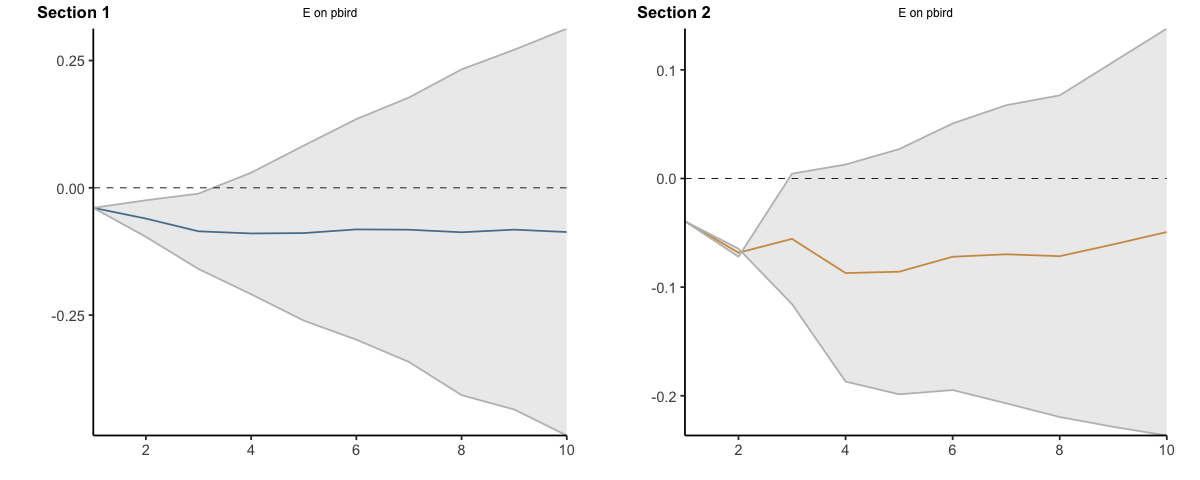

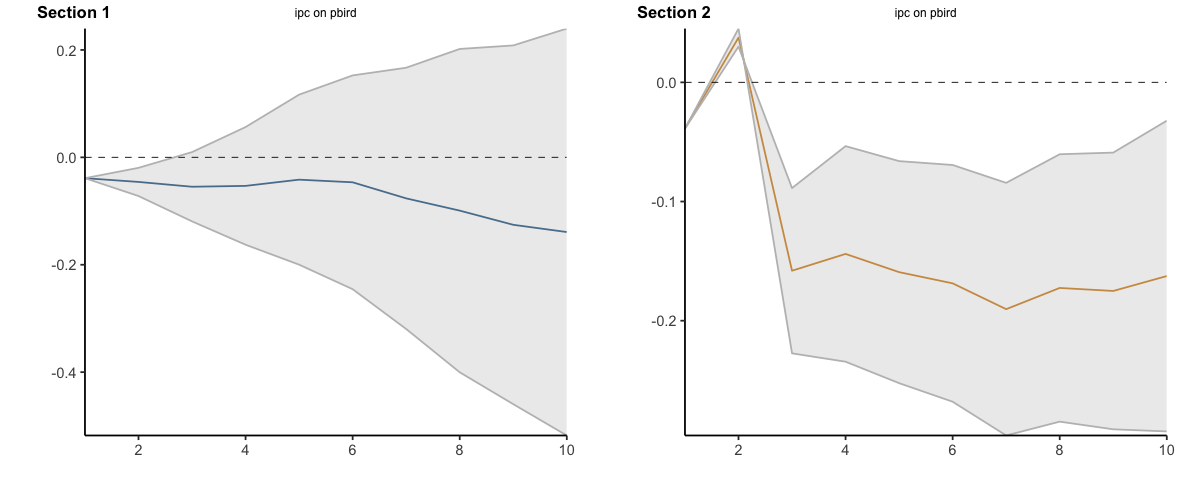

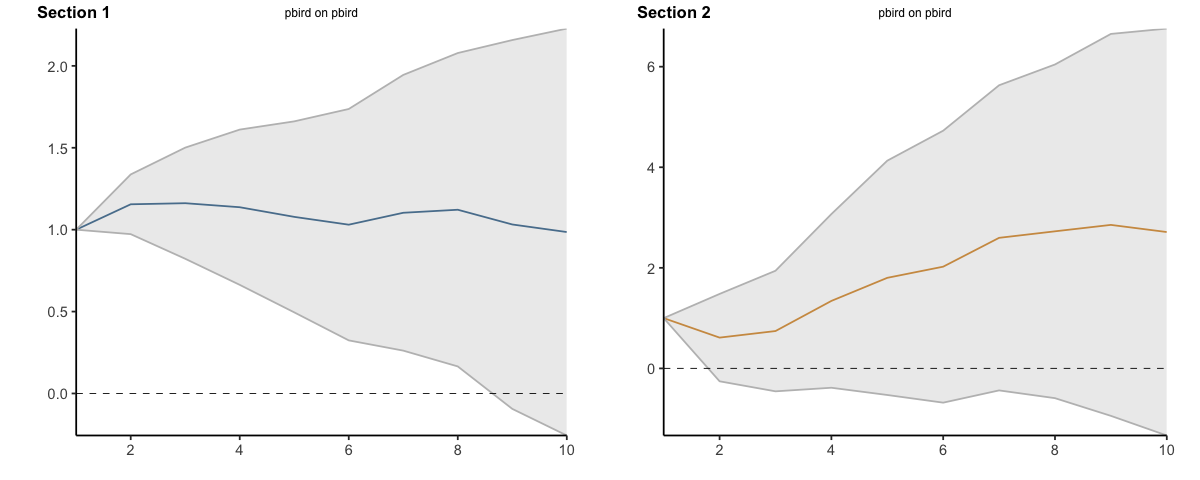

In [7]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa"), max_lags = 6, horizons = 10, signif = 0.95, trend = 0, cumulative = TRUE, threshold_var = c("D1"))

Run configurations:

lags_endog_lin,lags_criterion,max_lags,lags_exog,trend,shock_type,confint,hor,use_nw,nw_prewhite,nw_lag,adjust_se,use_twosls,model_type,starts,ends,column_names,endog
<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<chr>,<int>
4,NaN,NA,NA,0,1,0.68,10,TRUE,TRUE,NA,FALSE,FALSE,0,1,259,"impp_usa, E, ipc, pbird",4


LocalProjection (without exog) - Cumulative - signif 0.68

,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,impp_usa,E,1,-1.5884399,-1.588440,-1.588440
2,impp_usa,E,2,-2.4253698,-3.099881,-1.750859
3,impp_usa,E,3,-2.4199317,-3.783691,-1.056173
4,impp_usa,E,4,-3.3274466,-4.939325,-1.715569
5,impp_usa,E,5,-2.8062242,-5.000504,-0.611944
6,impp_usa,E,6,-1.5626984,-4.312302,1.186905
7,impp_usa,E,7,-1.1003821,-4.298843,2.098079
8,impp_usa,E,8,0.1065919,-3.544804,3.757988
9,impp_usa,E,9,1.7400770,-2.497646,5.977801


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
78,ipc,E,1,0.00000000,0.00000000,0.0000000
79,ipc,E,2,-0.29178191,-0.47679028,-0.1067735
80,ipc,E,3,-0.01971736,-0.34138128,0.3019466
81,ipc,E,4,0.42533642,-0.15295033,1.0036232
82,ipc,E,5,0.83720668,-0.03757299,1.7119863
83,ipc,E,6,0.68294870,-0.39108658,1.7569840
84,ipc,E,7,0.85645787,-0.44432601,2.1572417
85,ipc,E,8,0.91225965,-0.62511731,2.4496366
86,ipc,E,9,0.72036118,-0.95002020,2.3907426


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
111,pbird,E,1,0.0000000,0.000000,0.00000000
112,pbird,E,2,-0.7594019,-1.329511,-0.18929256
113,pbird,E,3,-1.2770469,-2.415691,-0.13840291
114,pbird,E,4,-1.5936000,-3.271410,0.08421018
115,pbird,E,5,-2.4351717,-4.737615,-0.13272833
116,pbird,E,6,-2.1676153,-4.905167,0.56993672
117,pbird,E,7,-2.6854000,-5.980237,0.60943726
118,pbird,E,8,-3.1300704,-6.826179,0.56603840
119,pbird,E,9,-2.5565865,-6.825196,1.71202282


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
34,E,impp_usa,1,0.000000000,0.00000000,0.00000000
35,E,impp_usa,2,-0.002232419,-0.01544312,0.01097828
36,E,impp_usa,3,-0.002094955,-0.03324097,0.02905106
37,E,impp_usa,4,0.002547604,-0.05026336,0.05535857
38,E,impp_usa,5,-0.004778076,-0.09230326,0.08274710
39,E,impp_usa,6,-0.004384612,-0.13222351,0.12345428
40,E,impp_usa,7,-0.003142917,-0.16230162,0.15601579
41,E,impp_usa,8,-0.017507840,-0.20564922,0.17063354
42,E,impp_usa,9,-0.022921001,-0.23763413,0.19179212


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
67,ipc,impp_usa,1,0.00000000,0.00000000,0.00000000
68,ipc,impp_usa,2,0.02308940,0.01006618,0.03611262
69,ipc,impp_usa,3,0.07191827,0.03850169,0.10533486
70,ipc,impp_usa,4,0.10490982,0.05066285,0.15915680
71,ipc,impp_usa,5,0.14314522,0.05745709,0.22883334
72,ipc,impp_usa,6,0.20888990,0.08619599,0.33158380
73,ipc,impp_usa,7,0.23257121,0.08171983,0.38342258
74,ipc,impp_usa,8,0.25309307,0.07631401,0.42987212
75,ipc,impp_usa,9,0.27214317,0.07098138,0.47330496


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
100,pbird,impp_usa,1,0.00000000,0.00000000,0.00000000
101,pbird,impp_usa,2,-0.02387382,-0.08951943,0.04177179
102,pbird,impp_usa,3,-0.03725382,-0.15536900,0.08086135
103,pbird,impp_usa,4,-0.04564630,-0.21466549,0.12337290
104,pbird,impp_usa,5,-0.04398285,-0.29489738,0.20693169
105,pbird,impp_usa,6,0.01928166,-0.29663331,0.33519663
106,pbird,impp_usa,7,0.03879697,-0.32996813,0.40756208
107,pbird,impp_usa,8,0.01331902,-0.41706691,0.44370496
108,pbird,impp_usa,9,-0.12253855,-0.62416338,0.37908628


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
45,E,ipc,1,0.4807211,0.4807211,0.4807211
46,E,ipc,2,0.9763415,0.6762197,1.2764634
47,E,ipc,3,1.2173273,0.6821138,1.7525408
48,E,ipc,4,1.6379031,0.8841186,2.3916876
49,E,ipc,5,1.9297528,0.9089188,2.9505868
50,E,ipc,6,2.1397259,0.9636092,3.3158425
51,E,ipc,7,2.2981804,0.9398200,3.6565409
52,E,ipc,8,2.5313746,0.9979577,4.0647915
53,E,ipc,9,2.6673257,0.9879513,4.3467001


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
12,impp_usa,ipc,1,-0.54521891,-0.54521891,-0.5452189
13,impp_usa,ipc,2,-0.83490092,-0.91987363,-0.7499282
14,impp_usa,ipc,3,-0.39791290,-0.98262751,0.1868017
15,impp_usa,ipc,4,-0.92937700,-1.65616382,-0.2025902
16,impp_usa,ipc,5,-0.58968526,-1.57045740,0.3910869
17,impp_usa,ipc,6,0.07343146,-1.31551031,1.4623732
18,impp_usa,ipc,7,0.41246847,-1.24439982,2.0693368
19,impp_usa,ipc,8,1.11408588,-0.79422254,3.0223943
20,impp_usa,ipc,9,2.42008979,0.09421413,4.7459654


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
122,pbird,ipc,1,0.00000000,0.00000000,0.0000000
123,pbird,ipc,2,0.12901031,-0.06618756,0.3242082
124,pbird,ipc,3,0.23773003,-0.27385070,0.7493108
125,pbird,ipc,4,0.23263560,-0.69827478,1.1635460
126,pbird,ipc,5,0.02748855,-1.30023951,1.3552166
127,pbird,ipc,6,0.04382379,-1.65450665,1.7421542
128,pbird,ipc,7,-0.16160297,-2.24722510,1.9240192
129,pbird,ipc,8,-0.64644383,-3.18024364,1.8873560
130,pbird,ipc,9,-0.13041419,-3.17705503,2.9162266


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
56,E,pbird,1,-0.03465381,-0.03465381,-0.034653806
57,E,pbird,2,-0.05565528,-0.07888807,-0.032422483
58,E,pbird,3,-0.06134776,-0.10432232,-0.018373210
59,E,pbird,4,-0.08341803,-0.15012441,-0.016711662
60,E,pbird,5,-0.08844089,-0.17421299,-0.002668797
61,E,pbird,6,-0.07411765,-0.17594739,0.027712095
62,E,pbird,7,-0.07346928,-0.19048527,0.043546708
63,E,pbird,8,-0.08078981,-0.21753487,0.055955246
64,E,pbird,9,-0.06869064,-0.21980994,0.082428652


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
23,impp_usa,pbird,1,0.30567183,0.30567183,0.3056718
24,impp_usa,pbird,2,0.38362959,0.32224885,0.4450103
25,impp_usa,pbird,3,0.48295137,0.34900383,0.6168989
26,impp_usa,pbird,4,0.56865605,0.36047097,0.7768411
27,impp_usa,pbird,5,0.46980116,0.20270863,0.7368937
28,impp_usa,pbird,6,0.36389593,0.05247054,0.6753213
29,impp_usa,pbird,7,0.29935503,-0.09526961,0.6939797
30,impp_usa,pbird,8,0.31203804,-0.12186164,0.7459377
31,impp_usa,pbird,9,0.12648073,-0.39053835,0.6434998


,impulse,response,horizon,irf_value,lower_bound,upper_bound
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
89,ipc,pbird,1,-0.03825094,-0.03825094,-0.0382509360
90,ipc,pbird,2,-0.01297025,-0.03376649,0.0078259848
91,ipc,pbird,3,-0.03129879,-0.06341179,0.0008142158
92,ipc,pbird,4,-0.04340312,-0.09708829,0.0102820550
93,ipc,pbird,5,-0.05529387,-0.12687438,0.0162866411
94,ipc,pbird,6,-0.05413601,-0.13911042,0.0308384005
95,ipc,pbird,7,-0.07402955,-0.17461532,0.0265562283
96,ipc,pbird,8,-0.09236039,-0.21093687,0.0262160885
97,ipc,pbird,9,-0.09619137,-0.22812830,0.0357455572


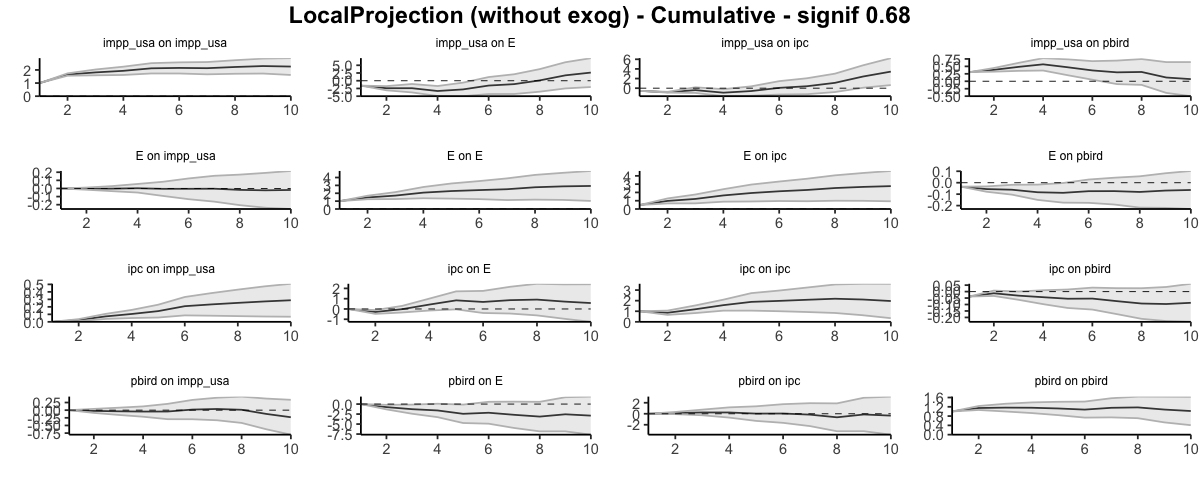

In [9]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), horizons=10, signif = 0.68, cumulative=TRUE, trend=0, fixed_lags=4)